In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [130]:
df = pd.read_csv("breast-cancer-wisconsin.txt",header = 0)
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [131]:
column_names = ['ID', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Diagnosis']

In [132]:
df.columns = column_names

In [197]:
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1,0
694,2,1,1,1,2,1,1,1,1,0
695,5,10,10,3,7,3,8,10,2,1
696,4,8,6,4,3,4,10,6,1,1


In [134]:
df.drop('ID', axis = 1, inplace = True)

In [135]:
df.shape

(698, 10)

In [136]:
df.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Diagnosis                      0
dtype: int64

In [143]:
df.drop(df.loc[df['Bare Nuclei'] == '?'].index, inplace = True)

In [148]:
df["Diagnosis"] = df['Diagnosis'].eq(4).mul(1)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              682 non-null    int64 
 1   Uniformity of Cell Size      682 non-null    int64 
 2   Uniformity of Cell Shape     682 non-null    int64 
 3   Marginal Adhesion            682 non-null    int64 
 4   Single Epithelial Cell Size  682 non-null    int64 
 5   Bare Nuclei                  682 non-null    object
 6   Bland Chromatin              682 non-null    int64 
 7   Normal Nucleoli              682 non-null    int64 
 8   Mitoses                      682 non-null    int64 
 9   Diagnosis                    682 non-null    int32 
dtypes: int32(1), int64(8), object(1)
memory usage: 55.9+ KB


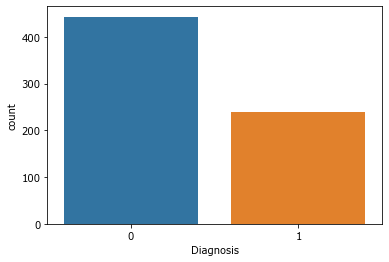

In [150]:
sns.countplot(x='Diagnosis',data=df);

In [151]:
df['Diagnosis'].value_counts()

0    443
1    239
Name: Diagnosis, dtype: int64

<ipython-input-152-60bde500c8bb>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


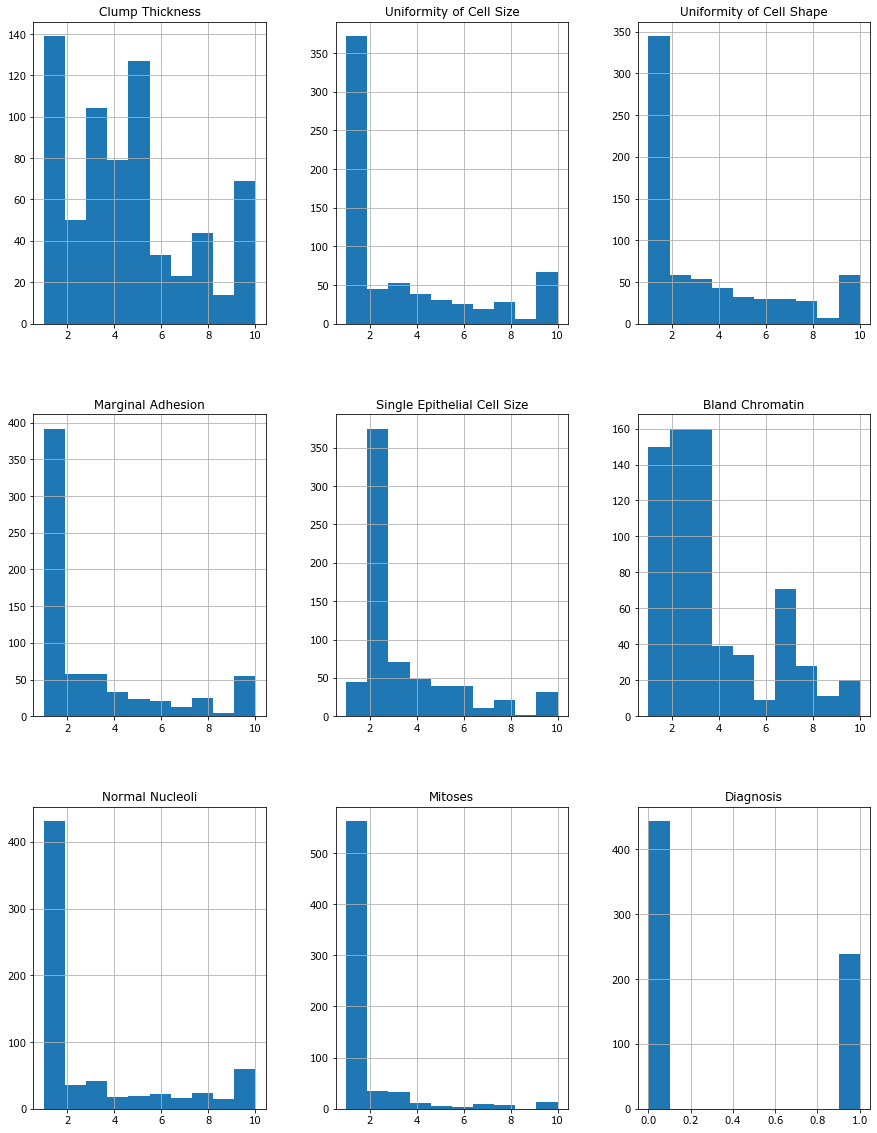

In [152]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [153]:
y = df['Diagnosis']

In [154]:
corr_matrix = df.corr()

In [155]:
corr_matrix

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
Clump Thickness,1.000000,0.642936,0.653968,0.488175,0.523891,0.553825,0.534406,0.351100,0.715306
Uniformity of Cell Size,0.642936,1.000000,0.907158,0.706786,0.753415,0.755663,0.719173,0.460603,0.820667
Uniformity of Cell Shape,0.653968,0.907158,1.000000,0.685735,0.722313,0.735460,0.717784,0.441096,0.821749
Marginal Adhesion,0.488175,0.706786,0.685735,1.000000,0.594340,0.668613,0.602893,0.418734,0.706097
Single Epithelial Cell Size,0.523891,0.753415,0.722313,0.594340,1.000000,0.618135,0.628743,0.480451,0.690789
Bland Chromatin,0.553825,0.755663,0.735460,0.668613,0.618135,1.000000,0.665638,0.345957,0.758350
Normal Nucleoli,0.534406,0.719173,0.717784,0.602893,0.628743,0.665638,1.000000,0.433602,0.718499
Mitoses,0.351100,0.460603,0.441096,0.418734,0.480451,0.345957,0.433602,1.000000,0.423278
Diagnosis,0.715306,0.820667,0.821749,0.706097,0.690789,0.758350,0.718499,0.423278,1.000000


In [156]:
corr_target = abs(corr_matrix["Diagnosis"])

In [157]:
relevant_features = corr_target[corr_target>0.5]

In [158]:
relevant_features

Clump Thickness                0.715306
Uniformity of Cell Size        0.820667
Uniformity of Cell Shape       0.821749
Marginal Adhesion              0.706097
Single Epithelial Cell Size    0.690789
Bland Chromatin                0.758350
Normal Nucleoli                0.718499
Diagnosis                      1.000000
Name: Diagnosis, dtype: float64

In [159]:
new_cor_matrix = df.drop(['Diagnosis', 'Mitoses'], axis = 1).corr()

In [160]:
new_cor_matrix

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli
Clump Thickness,1.000000,0.642936,0.653968,0.488175,0.523891,0.553825,0.534406
Uniformity of Cell Size,0.642936,1.000000,0.907158,0.706786,0.753415,0.755663,0.719173
Uniformity of Cell Shape,0.653968,0.907158,1.000000,0.685735,0.722313,0.735460,0.717784
Marginal Adhesion,0.488175,0.706786,0.685735,1.000000,0.594340,0.668613,0.602893
Single Epithelial Cell Size,0.523891,0.753415,0.722313,0.594340,1.000000,0.618135,0.628743
Bland Chromatin,0.553825,0.755663,0.735460,0.668613,0.618135,1.000000,0.665638
Normal Nucleoli,0.534406,0.719173,0.717784,0.602893,0.628743,0.665638,1.000000


In [161]:
#As the correlation between Uniformity of Cell Size and Uniformity of Cell Shape is greater than 90
#We will use only Uniformity of Cell Shape, as the correlation betweern Uniformity of Cell Shape and Diagnosis is greater.
X = df.drop(['Diagnosis', 'Uniformity of Cell Size', 'Mitoses'], axis = 1)

In [162]:
X.head()

,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,5,4,5,7,10,3,2
1,3,1,1,2,2,3,1
2,6,8,1,3,4,3,7
3,4,1,3,2,1,3,1
4,8,10,8,7,10,9,7


Accuracy is:  0.975609756097561


<AxesSubplot:>

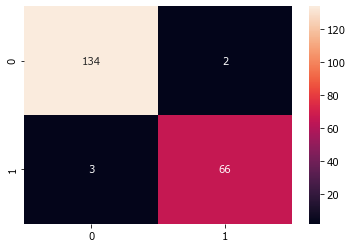

In [163]:
#Random forest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [183]:

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf_rf.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [164]:
score_rf = cross_val_score(clf_rf,X,y, scoring='accuracy')
print(score_rf)

[0.91240876 0.94890511 0.98529412 0.98529412 0.98529412]


In [165]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score_rf.mean(), score_rf.std()))

0.96 accuracy with a standard deviation of 0.03


In [166]:
print(classification_report(y_test, clf_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       136
           1       0.97      0.96      0.96        69

    accuracy                           0.98       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.98      0.98      0.98       205



In [167]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [168]:
y_pred_lg = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [169]:
ac_lg = accuracy_score(y_test,logreg.predict(x_test))
print('Accuracy is: ',ac_lg)

Accuracy is:  0.9658536585365853


In [170]:
score_lg = cross_val_score(logreg,X,y,scoring='accuracy')
print("%0.2f accuracy with a standard deviation of %0.2f" % (score_lg.mean(), score_lg.std()))

0.96 accuracy with a standard deviation of 0.03


In [171]:
from sklearn.metrics import confusion_matrix
confusion_matrix_lg = confusion_matrix(y_test, y_pred_lg)
print(confusion_matrix_lg)

[[134   2]
 [  5  64]]


In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       136
           1       0.97      0.93      0.95        69

    accuracy                           0.97       205
   macro avg       0.97      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205



In [173]:
#support vector machine
from sklearn import svm
clf=svm.SVC(gamma="scale")
clf.fit(x_train,y_train)

SVC()

In [174]:
predictions=clf.predict(x_test)

In [175]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       136
           1       0.97      0.96      0.96        69

    accuracy                           0.98       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.98      0.98      0.98       205



In [176]:
confusion_matrix_clf = confusion_matrix(y_test, predictions)
print(confusion_matrix_clf)

[[134   2]
 [  3  66]]


In [180]:
print('Accuracy of support vector machine classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of support vector machine classifier on test set: 0.98


In [181]:
score_clf = cross_val_score(clf,X,y,scoring='accuracy')

In [182]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score_clf.mean(), score_clf.std()))

0.97 accuracy with a standard deviation of 0.02


In [187]:
from sklearn.model_selection import GridSearchCV
def Classification_model_gridsearchCV(model,param_grid,data_X,data_y):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    clf.fit(x_train,y_train)
    print("The best parameter found on development set is :")
    print(clf.best_params_)
    print("the bset estimator is ")
    print(clf.best_estimator_)
    print("The best score is ")
    print(clf.best_score_)

In [189]:
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]
Classification_model_gridsearchCV(clf,param_grid,X,y)
#we get worse accuracy,which eans that the default parametrs are better than the chosen ones.

The best parameter found on development set is :
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
the bset estimator is 
SVC(C=1000, gamma=0.0001)
The best score is 
0.9684840425531915
